# Load data from a remote server 

Extracts trials recorded with the imager and converted into mj2 files.

This can take a while depending on the connectivity

In [ ]:
remotepath = '\\\\grid-hs.cshl.edu\\churchland_nlsas_data\\data\\BpodImager\\Animals\\CSP23\\SpatialDisc\\12-Mar-2020'
localdisk = 'd:\\temp_folder' # this should be an SSD or a fast drive

from wfieldtools import parse_imager_mj2_folder
# WARNING: this can take some time (copying data) 
dat,frames_avg, trialonsets,trialinfo = parse_imager_mj2_folder(remotepath, localdisk)

In [1]:
# Load trial information, like the stimulus onset and the time of each frame

from wfieldtools import *

trialinfo = pd.read_csv(pjoin(localdisk,'trial_info.csv'))
trialinfo

,Unnamed: 0,itrial,baseline,onset,ch2,ch1
0,0,0,3.0,737862.452237,[ 313 380 446 513 580 646 713 780 846 ...,[ 280 347 413 480 547 614 680 747 814 ...
1,1,1,3.0,737862.452327,[ 322 389 455 522 589 655 722 789 855 ...,[ 289 356 422 489 556 622 689 756 822 ...
2,2,2,3.0,737862.452411,[ 322 389 455 522 589 655 722 789 855 ...,[ 289 356 422 489 556 622 689 756 822 ...
3,3,3,3.0,737862.452506,[ 327 394 460 527 594 660 727 794 860 ...,[ 294 361 427 494 561 627 694 761 828 ...
4,4,4,3.0,737862.452595,[ 314 381 448 514 581 648 714 781 848 ...,[ 281 348 415 481 548 615 682 748 815 ...
...,...,...,...,...,...,...
408,408,408,3.0,737862.490031,[ 310 377 444 510 577 644 710 777 844 ...,[ 277 344 411 477 544 611 677 744 811 ...
409,409,409,3.0,737862.490129,[ 316 383 450 516 583 650 716 783 850 ...,[ 283 350 417 483 550 617 683 750 817 ...
410,410,410,3.0,737862.490220,[ 309 375 442 509 575 642 709 776 842 ...,[ 276 343 409 476 543 609 676 743 809 ...
411,411,411,3.0,737862.490309,[ 299 365 432 499 565 632 699 765 832 ...,[ 266 332 399 466 533 599 666 733 799 ...


# Explore the raw data

   Explore the raw data with napari
   
   Plot the average images

In [1]:
# Look at the data using napari (this does not load data into memory)
from wfieldtools import *

localdisk = 'd:\\temp_folder'

dat_path = glob(pjoin(localdisk,'*.dat'))[0]
trial_onsets = np.load(pjoin(localdisk,'trial_onsets.npy'))

dat = mmap_dat(dat_path)

napari_show(dat)

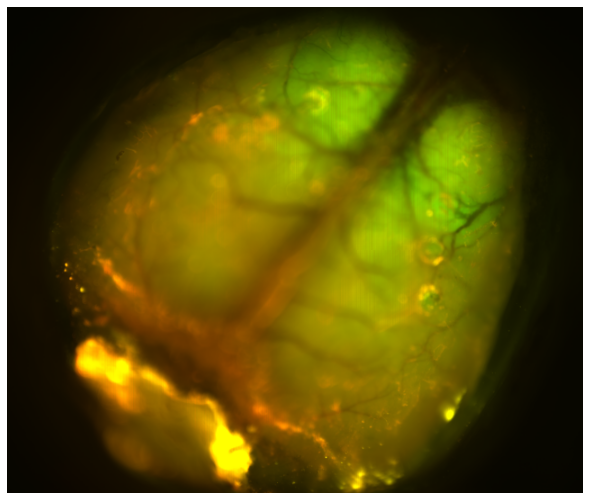

In [2]:
%matplotlib inline

frames_avg = np.load(pjoin(localdisk,'frames_average.npy'))

imshow_noborder(two_chan_to_rgb(frames_avg[::-1]), figsize=[8,8]);


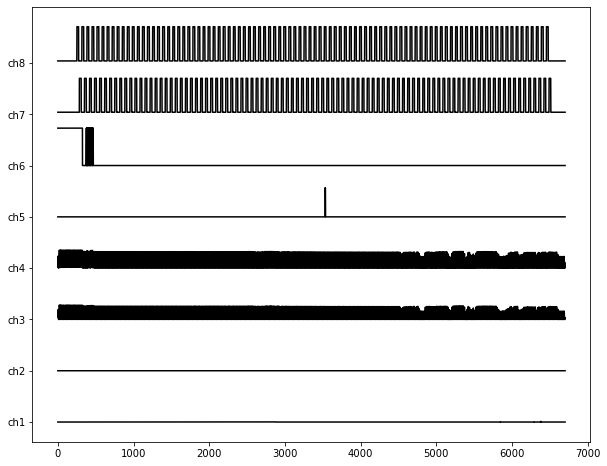

In [30]:
# Load and plot imager analog data
remotepath = '\\\\grid-hs.cshl.edu\\churchland_nlsas_data\\data\\BpodImager\\Animals\\CSP23\\SpatialDisc\\12-Mar-2020'
from wfieldtools import *

dat,info = read_imager_analog(natsorted(glob(pjoin(remotepath,'Analog*.dat')))[400])

%matplotlib inline
plt.figure(figsize=[10,8])
plt.plot(dat[1:,:].T+np.arange(len(dat)-1)*5000,'k')
plt.yticks(np.arange(len(dat)-1)*5000,['ch{0}'.format(i+1) for i in np.arange(len(dat)-1)]);
